## Markdown Text Tutorial

**Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!**
$e^{i\pi} + 1=0$
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$
```python
print "Hello World"
```

```javascript
console.log("Hello World")
```
| This | is   |
|------|------|
|   a  | table|

<h2> Heading 2</h2>
<img src="../images/python_logo.jpeg" />

# **Convolutional Neural Networks (CNN's)**
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/cnn2.jpeg"/>

### Why another type of Networks?

### Problem with Multilayer Perceptrons(MLP's)
- Overfitting due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!

<img src="https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/invariance.png"/>

## Convolution layer?
- Convolution Layers are made up of filters
- But what are these filters?

### Code Example
Let's go through one code example to understand "Filters" and "Convolution"

When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [2]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [11]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use('seaborn')
    plt.title(title + str(img.shape))
    plt.show()

(100, 100, 3)
(100, 100)


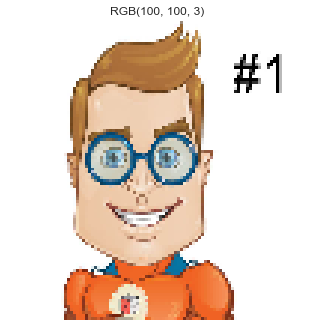

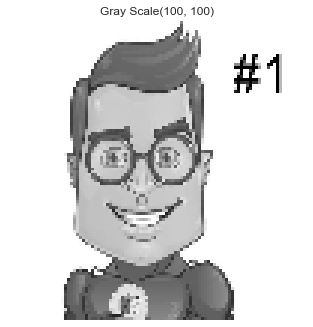

In [12]:
img_ = cv2.imread("./cody2.jpg")
img_ = cv2.resize(img_,(100,100))
print(img_.shape)
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img,"RGB")
drawImg(img_gray,"Gray Scale")

In [28]:
def convolutionOld(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(1,W-1):
        for col in range(1,H-1):
            for i in range(F):
                for j in range(F):
                    new_img[row-1][col-1] += img[row-1+i][col-1+j]*img_filter[i][j]
                if new_img[row-1][col-1] > 255:
                    new_img[row-1][col-1] = 255
                elif new_img[row-1][col-1] < 0:
                    new_img[row-1][col-1] = 0
                    
    return new_img

In [29]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(1,W-F+1):
        for col in range(1,H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                if(new_img[row][col] > 255):
                    new_img[row][col] = 255
                elif(new_img[row][col] < 0):
                    new_img[row][col] = 0
    return new_img

In [39]:
blur_filter = np.ones((3,3))/9.0
output1_0 = convolutionOld(img_gray,blur_filter)

In [40]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2_0 = convolutionOld(img_gray,edge_filter)

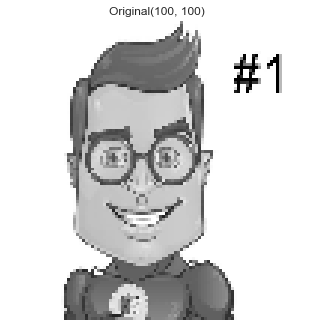

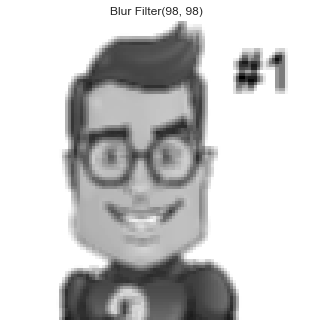

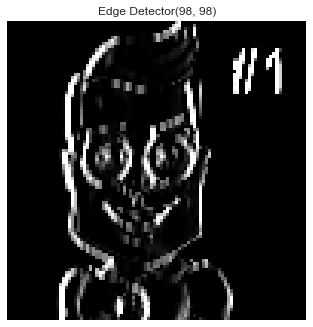

In [41]:
drawImg(img_gray,"Original")
drawImg(output1_0,"Blur Filter")
drawImg(output2_0,"Edge Detector")

In [42]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolution(img_gray,edge_filter)

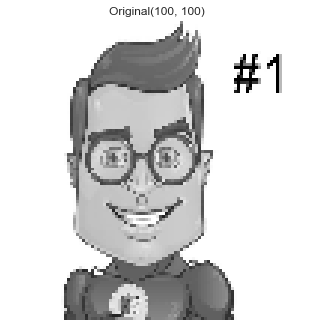

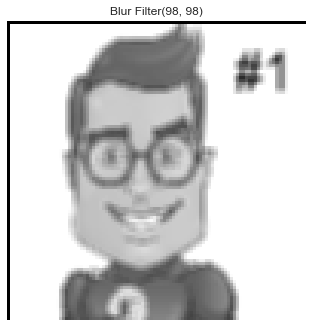

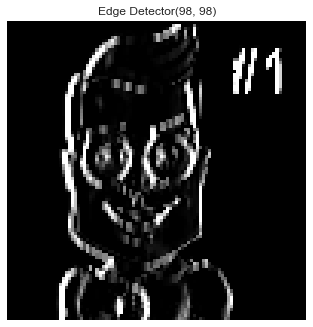

In [43]:
drawImg(img_gray,"Original")
drawImg(output1,"Blur Filter")
drawImg(output2,"Edge Detector")

In [44]:
output1_0 == output1

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])

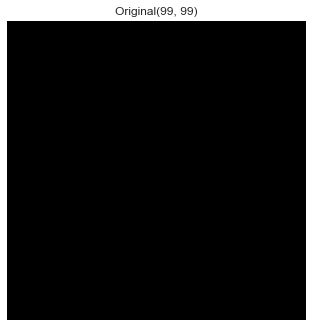

In [45]:
new_img = np.zeros((99,99))
drawImg(new_img,"Original")

So Filters can highlight "Features" that can be useful to classify images. Color is not always important, features like edges help in detecting objects!

## Buzzwords in CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling (Average/Maxpooling)

### Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride
- In our example we used a stride of (1,1) along W and H
- You can also use a stride of (2,2) in that case the output volume will have less W and H

**Input and Output Sizes**: (assuming 0 padding)$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$ $$ n_C = n_{C_{prev}}$$

<img src="https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/Convolution_schematic.gif"/>


### Padding
- Convolution operation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding
**Input and Output Sizes after Convolution**: (with padding)

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_C = \text{number of filters used in the convolution}$$

<img src="https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/cody_pad.jpg"/>

In [50]:
# padding image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200)

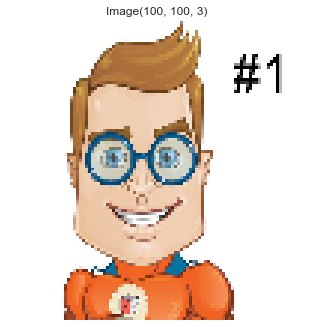

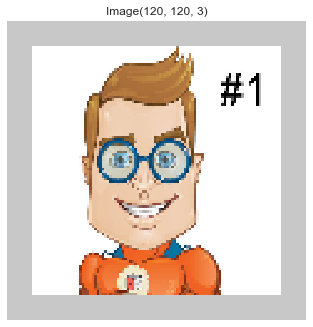

In [51]:
drawImg(img)
drawImg(pad_img)

In [52]:
np.pad?

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- **Max-pooling layer**: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- **Average-pooling layer**: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)

- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size.

<img src="https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/mp.png"/>

## Implement The Pooling Operation

In [55]:
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])
H,W = X.shape
f = 2
stride = 2

#Zero Padding 
H0 = int((H-f)/stride) + 1
W0 = int((W-f)/stride) + 1

X_pool_output = np.zeros((2,2))

for r in range(H0):
    for c in range(W0):
        r_start = r*stride
        r_end = r_start + f
        c_start = c*stride
        c_end = c_start + f
        
        X_slice = X[r_start:r_end,c_start:c_end]
        X_pool_output[r][c] = np.max(X_slice)
        
print("X \n",X)
print("X after Pooling \n",X_pool_output)

X 
 [[1 0 2 3]
 [4 6 6 8]
 [3 1 1 0]
 [1 2 2 4]]
X after Pooling 
 [[6. 8.]
 [3. 4.]]


## General CNN Architecture

<img src="https://github.com/prateek27/convolution-neural-network-tutorial/raw/59a316a1e6a9fa0f283b82fc18f9b40a05f58c44/images/arch.png"/>

[Conv Layers--> ReLu--->Pooling] --> FC -->Softmax